# **Car price prdeiction model**

## **IMports**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


## **Data collection and processing**

In [2]:
file_path=('/content/drive/MyDrive/car price prediction/car data.csv')

In [3]:
car_df = pd.read_csv(file_path)

In [4]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_df.shape


(301, 9)

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#checking no of missing values
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:


#checking distributuion of categorical data
print(car_df.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [9]:
#checking distributuion of categorical data
print(car_df.Seller_Type.value_counts())
#checking distributuion of categorical data
print(car_df.Transmission.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### **Encoding Catergorical data**

In [10]:
#convert categorical values to numerical aka encoding

car_df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

car_df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

car_df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)




## **Spiltting data into train and test**

In [11]:
X= car_df.drop(['Car_Name','Selling_Price'],axis=1)
Y= car_df['Selling_Price']

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2, )#stratify=true

## **Model training**

## **Linear Regression**

In [13]:
#loading the model
lin_reg_model= LinearRegression()

In [14]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

 **Model Evaluation**

### **Train data**

In [15]:
training_data_prediction = lin_reg_model.predict(X_train)

In [18]:
# r square error in classificatio we use accuracy score but here we use r square
error_score = metrics.r2_score(Y_train,training_data_prediction)
print('R squared error :', error_score)


R squared error : 0.8799451660493711


**Visualize the actual price vs predicted price**

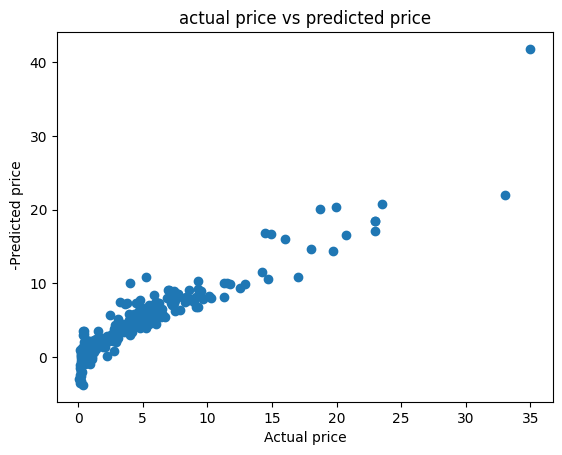

In [19]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel(" -Predicted price")
plt.title("actual price vs predicted price")
plt.show()

### **Test Data**

In [20]:
test_data_prediction = lin_reg_model.predict(X_test)

In [21]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R squared error :', error_score)

R squared error : 0.8365766715027051


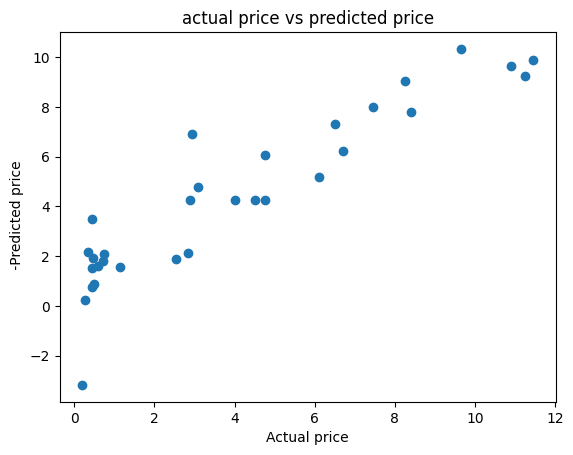

In [23]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel(" -Predicted price")
plt.title("actual price vs predicted price")
plt.show()

##**Lasso**

In [24]:
#loading the model
lasso_reg_model= Lasso()

In [25]:
lasso_reg_model.fit(X_train,Y_train)

Lasso()

 **Model Evaluation**

### **Train data**

In [26]:
training_data_prediction = lasso_reg_model.predict(X_train)

In [27]:
# r square error in classificatio we use accuracy score but here we use r square
error_score = metrics.r2_score(Y_train,training_data_prediction)
print('R squared error :', error_score)


R squared error : 0.8427856123435794


**Visualize the actual price vs predicted price**

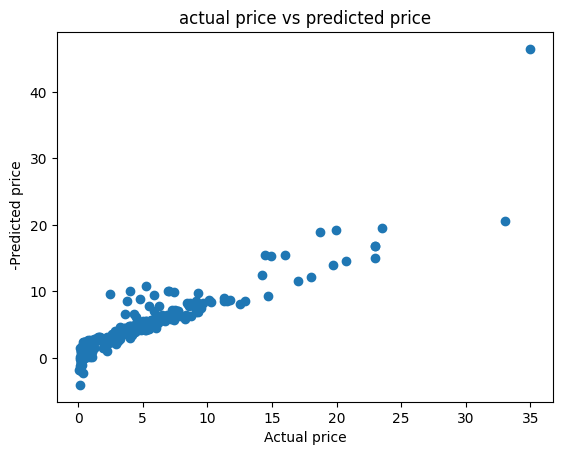

In [28]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel(" -Predicted price")
plt.title("actual price vs predicted price")
plt.show()

### **Test Data**

In [30]:
test_data_prediction = lasso_reg_model.predict(X_test)

In [31]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R squared error :', error_score)

R squared error : 0.8709167941173195


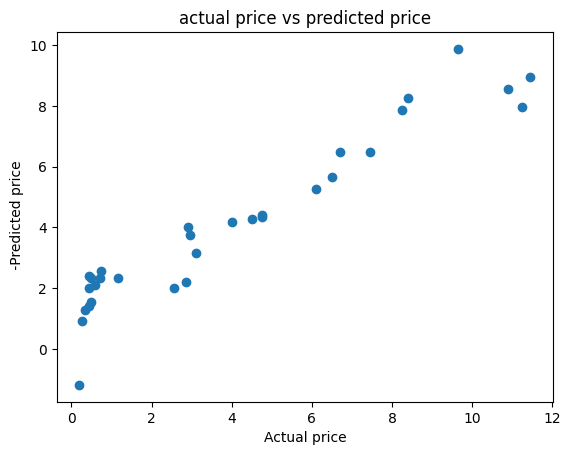

In [32]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel(" -Predicted price")
plt.title("actual price vs predicted price")
plt.show()